Project Goal:
- Identify high-risk customers for proactive retention
- Optimize intervention strategy to maximize ROI
- Provide actionable business recommendations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [3]:
print(f"\nDataset Shape: {df.shape}")
print(f"Total Customers: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
df.info()


Dataset Shape: (7043, 33)
Total Customers: 7,043
Total Features: 33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Mul

There are 33 columns with 7043 data.

Only churn reason has null values in this dataset.

In [4]:
print("\nMissing Values:")
missing = df.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print(missing)
else:
    print("No missing values found initially")

print("\nTarget Variable Distribution:")
print(df['Churn Value'].value_counts())
churn_rate = df['Churn Value'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.1f}%")


Missing Values:
Churn Reason    5174
dtype: int64

Target Variable Distribution:
Churn Value
0    5174
1    1869
Name: count, dtype: int64
Overall Churn Rate: 26.5%


In [5]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### Target variable (Churn value) is binary.

In [6]:
leakage_cols = [
    "Churn Label",
    "Churn Score",
    "Churn Reason",
    "CLTV",
    "Count"
]

df.drop(columns=leakage_cols, inplace=True)

Removed post-churn and leakage variables to avoid inflating model performance.

In [7]:
location_cols = [
    "CustomerID",
    "Country",
    "State",
    "City",
    "Zip Code",
    "Lat Long",
    "Latitude",
    "Longitude"
]

df.drop(columns=location_cols, inplace=True)

In [8]:
df.rename(columns={"Churn Value": "Churn"}, inplace=True)

In [9]:
df["Senior Citizen"].value_counts()

,count
Senior Citizen,
No,5901
Yes,1142


In [10]:
df["Senior Citizen"] = df["Senior Citizen"].map({"Yes": 1, "No": 0})

In [11]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

In [12]:
df.isnull().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0
Online Security,0
Online Backup,0


In [13]:
df.dropna(inplace=True)

In [14]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [15]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7032 non-null   object 
 1   senior_citizen     7032 non-null   int64  
 2   partner            7032 non-null   object 
 3   dependents         7032 non-null   object 
 4   tenure_months      7032 non-null   int64  
 5   phone_service      7032 non-null   object 
 6   multiple_lines     7032 non-null   object 
 7   internet_service   7032 non-null   object 
 8   online_security    7032 non-null   object 
 9   online_backup      7032 non-null   object 
 10  device_protection  7032 non-null   object 
 11  tech_support       7032 non-null   object 
 12  streaming_tv       7032 non-null   object 
 13  streaming_movies   7032 non-null   object 
 14  contract           7032 non-null   object 
 15  paperless_billing  7032 non-null   object 
 16  payment_method     7032 non-n

,senior_citizen,tenure_months,monthly_charges,total_charges,churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [16]:
df.to_csv("Cleaned_Telco_Churn.csv", index=False)

#EXPLORATORY DATA ANALYSIS (EDA)

churn
0    5163
1    1869
Name: count, dtype: int64

Churn Rate: 26.6%


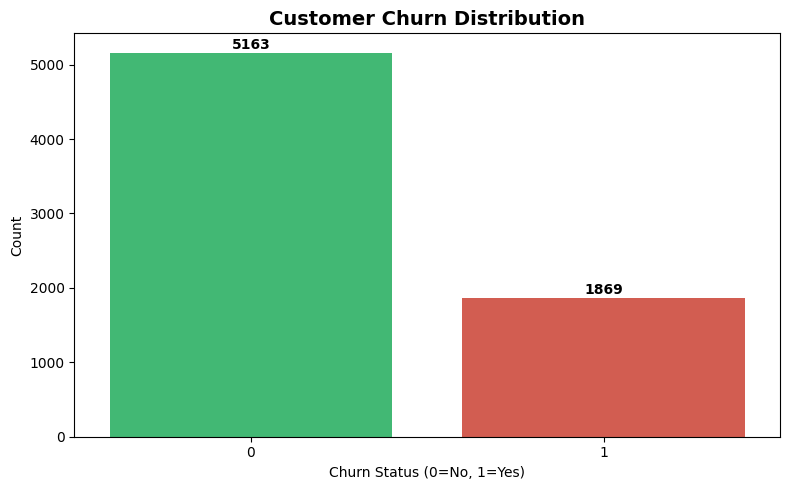

In [18]:
churn_counts = df['churn'].value_counts()
print(churn_counts)
print(f"\nChurn Rate: {df['churn'].mean() * 100:.1f}%")

plt.figure(figsize=(8, 5))
sns.countplot(x="churn", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Customer Churn Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Churn Status (0=No, 1=Yes)")
plt.ylabel("Count")
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

The dataset shows moderate class imbalance, with churned customers forming a minority. This will be considered during model evaluation.

##NUMERICAL FEATURES VS CHURN


Tenure Analysis:
            mean   50%        std
churn                            
0      37.650010  38.0  24.076940
1      17.979133  10.0  19.531123


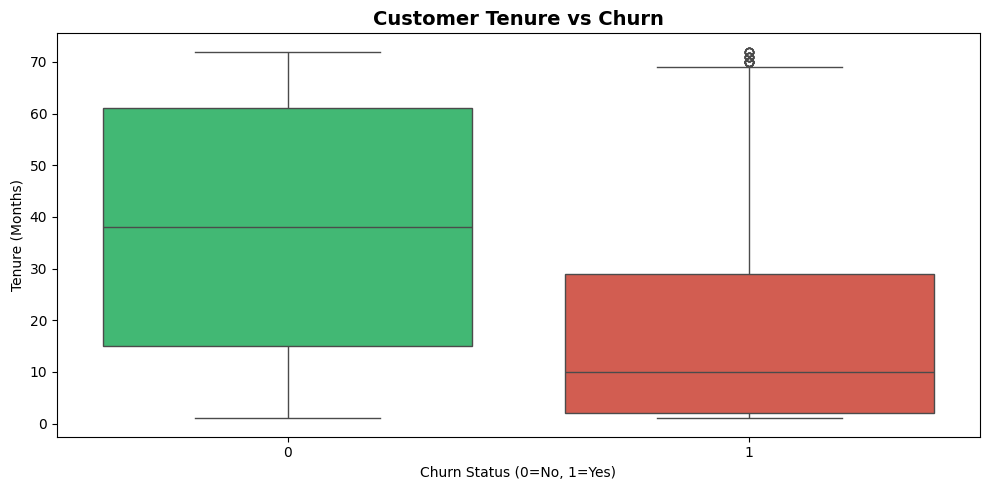

In [19]:
print("\nTenure Analysis:")
tenure_stats = df.groupby('churn')['tenure_months'].describe()
print(tenure_stats[['mean', '50%', 'std']])

plt.figure(figsize=(10, 5))
sns.boxplot(x="churn", y="tenure_months", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Customer Tenure vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Churn Status (0=No, 1=Yes)")
plt.ylabel("Tenure (Months)")
plt.tight_layout()
plt.savefig('tenure_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

Customers with shorter tenure are significantly more likely to churn, indicating early customer experience is critical.


Monthly Charges Analysis:
            mean    50%        std
churn                             
0      61.307408  64.45  31.094557
1      74.441332  79.65  24.666053


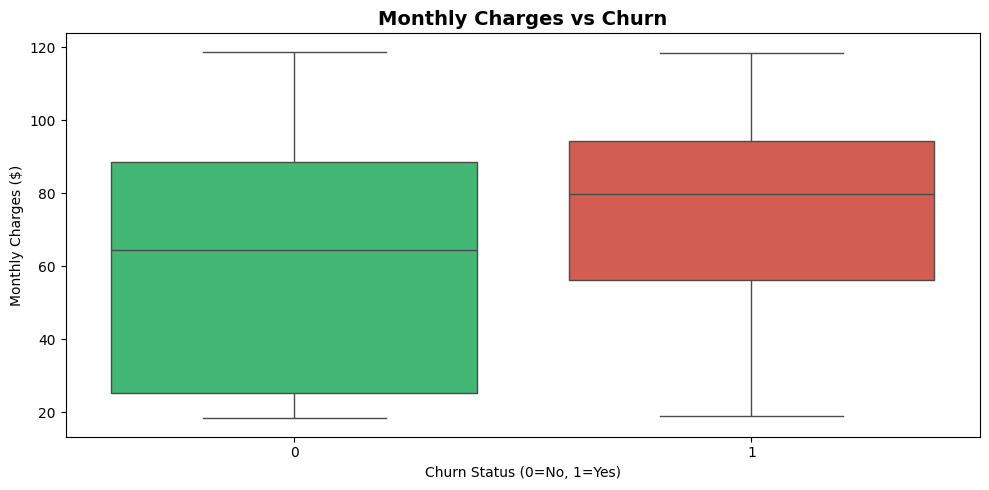

In [20]:
print("\nMonthly Charges Analysis:")
charges_stats = df.groupby('churn')['monthly_charges'].describe()
print(charges_stats[['mean', '50%', 'std']])

plt.figure(figsize=(10, 5))
sns.boxplot(x="churn", y="monthly_charges", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Monthly Charges vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Churn Status (0=No, 1=Yes)")
plt.ylabel("Monthly Charges ($)")
plt.tight_layout()
plt.savefig('monthly_charges_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

Customers paying higher monthly charges exhibit higher churn, suggesting pricing sensitivity.

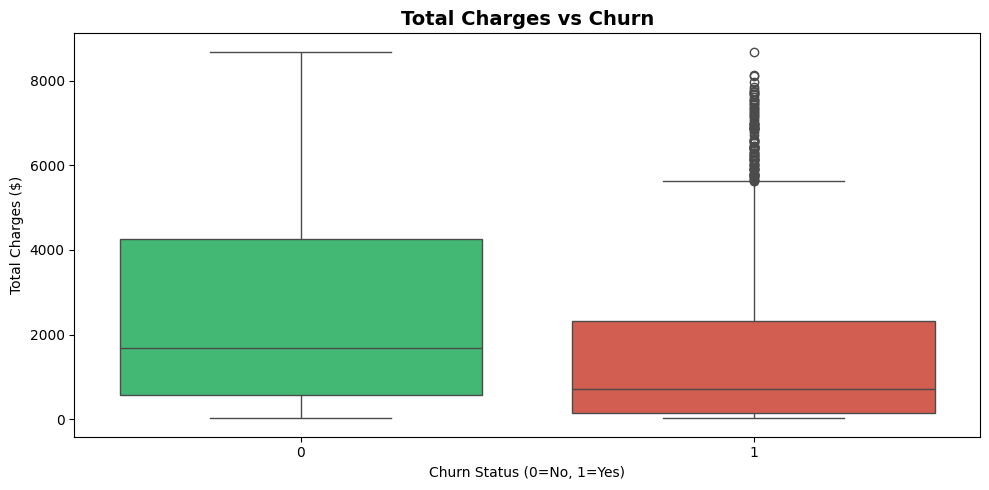

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="churn", y="total_charges", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Total Charges vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Churn Status (0=No, 1=Yes)")
plt.ylabel("Total Charges ($)")
plt.tight_layout()
plt.savefig('total_charges_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

Lower total charges for churned customers.

##CATEGORICAL FEATURES VS CHURN


Contract Type Analysis:
                count   sum  churn_rate_%
contract                                 
Month-to-month   3875  1655          42.7
One year         1472   166          11.3
Two year         1685    48           2.8


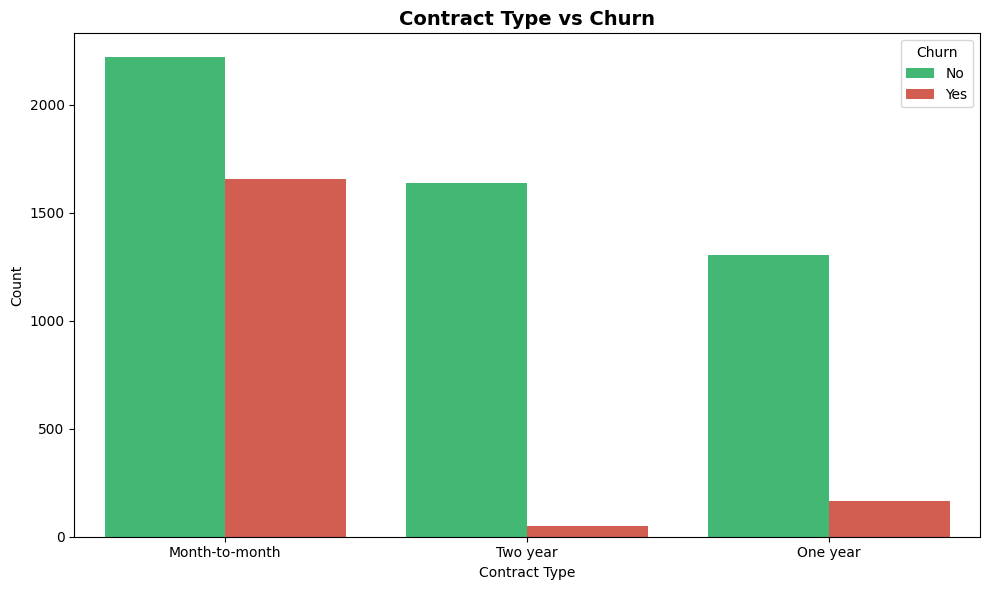

In [22]:
print("\nContract Type Analysis:")
contract_churn = df.groupby('contract')['churn'].agg(['sum', 'count', 'mean'])
contract_churn['churn_rate_%'] = (contract_churn['mean'] * 100).round(1)
print(contract_churn[['count', 'sum', 'churn_rate_%']])

plt.figure(figsize=(10, 6))
sns.countplot(x="contract", hue="churn", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Contract Type vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('contract_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

Month-to-month customers churn most

Long-term contracts retain customers

**Encouraging long-term contracts can significantly reduce churn.**


Internet Service Analysis:
                  count      mean  churn_rate_%
internet_service                               
DSL                2416  0.189983          19.0
Fiber optic        3096  0.418928          41.9
No                 1520  0.074342           7.4


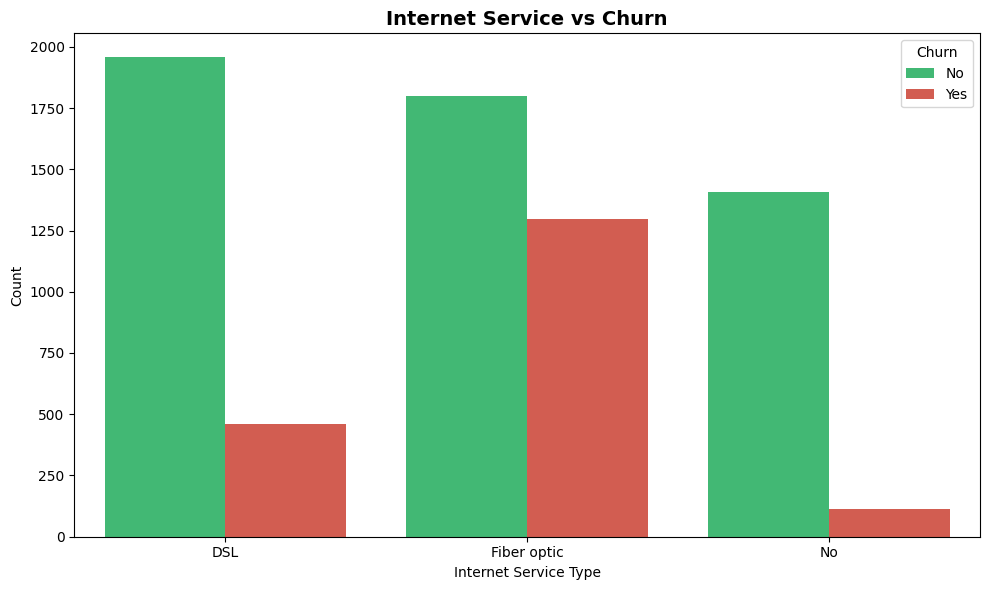

In [23]:
print("\nInternet Service Analysis:")
internet_churn = df.groupby('internet_service')['churn'].agg(['count', 'mean'])
internet_churn['churn_rate_%'] = (internet_churn['mean'] * 100).round(1)
print(internet_churn)

plt.figure(figsize=(10, 6))
sns.countplot(x="internet_service", hue="churn", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Internet Service vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('internet_service_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

Fiber optic customers churn more

Possible quality or pricing issue


Online Security Analysis:
                     count      mean  churn_rate_%
online_security                                   
No                    3497  0.417787          41.8
No internet service   1520  0.074342           7.4
Yes                   2015  0.146402          14.6


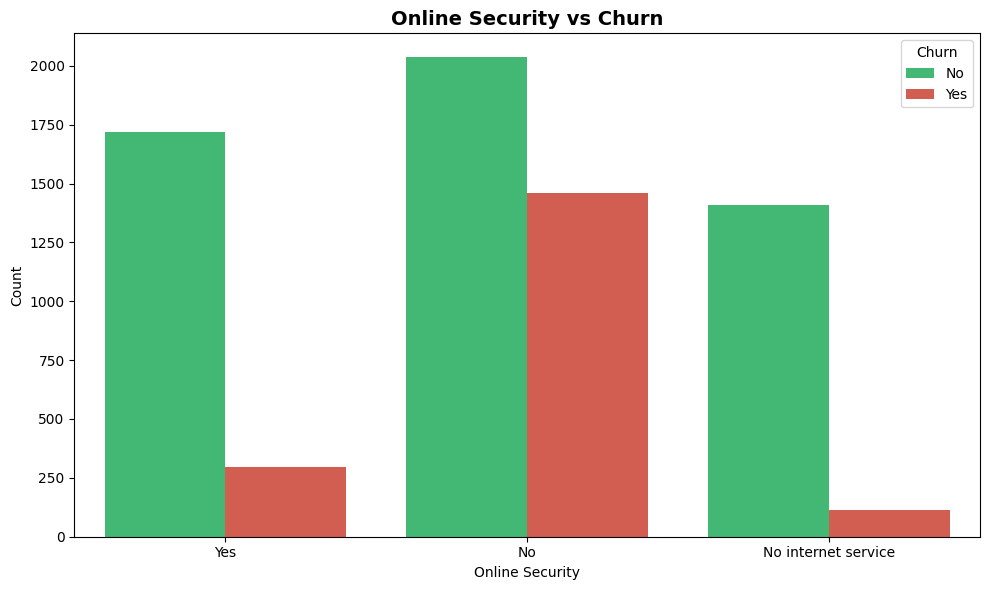

In [24]:
print("\nOnline Security Analysis:")
security_churn = df.groupby('online_security')['churn'].agg(['count', 'mean'])
security_churn['churn_rate_%'] = (security_churn['mean'] * 100).round(1)
print(security_churn)

plt.figure(figsize=(10, 6))
sns.countplot(x="online_security", hue="churn", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Online Security vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('online_security_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

Customers without online security churn more


**Value-added services reduce churn risk.**


Tech Support Analysis:
                     count      mean  churn_rate_%
tech_support                                      
No                    3472  0.416475          41.6
No internet service   1520  0.074342           7.4
Yes                   2040  0.151961          15.2


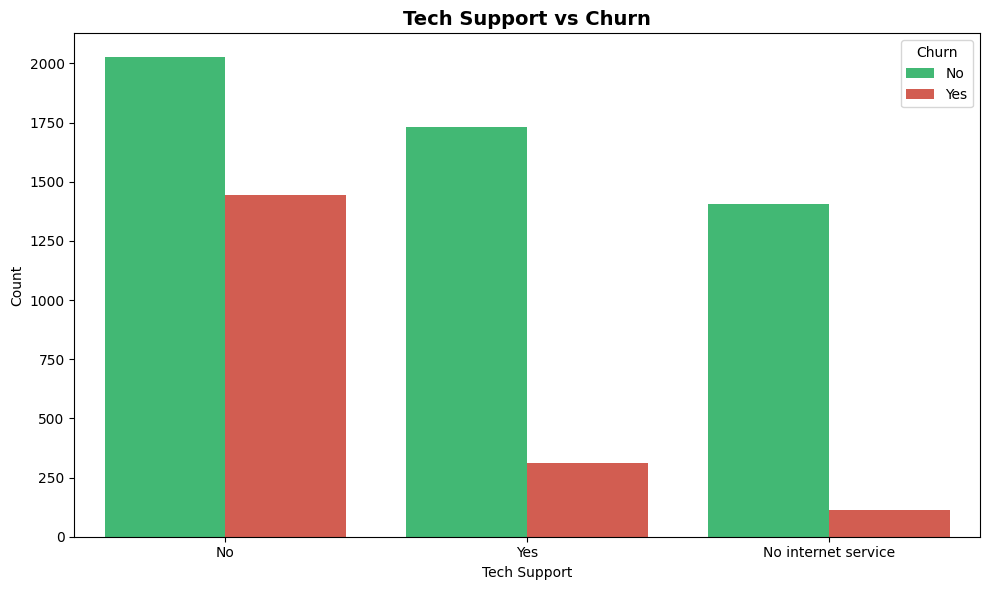

In [25]:
print("\nTech Support Analysis:")
tech_churn = df.groupby('tech_support')['churn'].agg(['count', 'mean'])
tech_churn['churn_rate_%'] = (tech_churn['mean'] * 100).round(1)
print(tech_churn)

plt.figure(figsize=(10, 6))
sns.countplot(x="tech_support", hue="churn", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Tech Support vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('tech_support_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

Tech support availability lowers churn

##BILLING & PAYMENT BEHAVIOR


Paperless Billing Analysis:
                   count      mean  churn_rate_%
paperless_billing                               
No                  2864  0.163757          16.4
Yes                 4168  0.335893          33.6


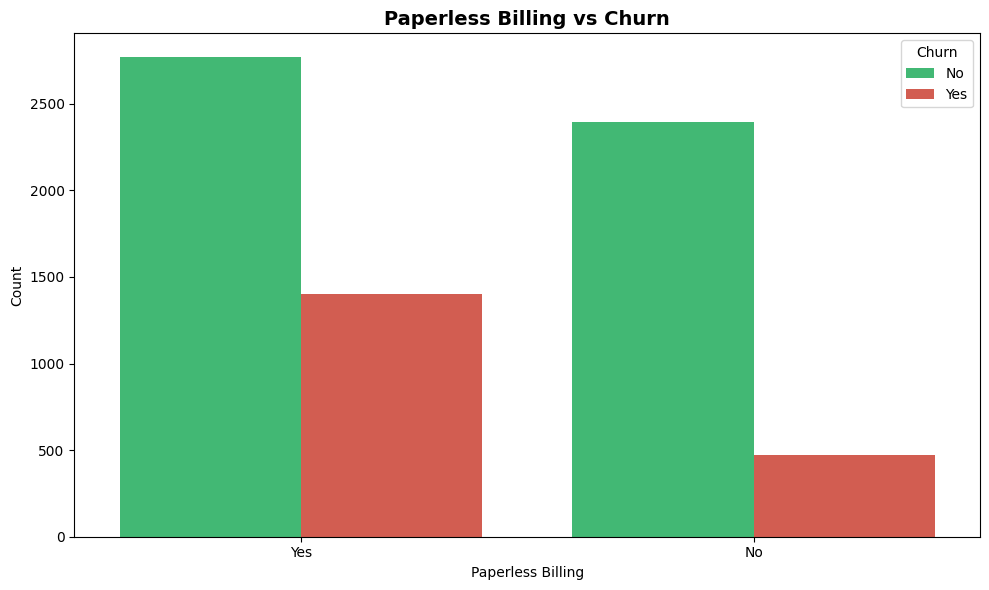

In [26]:
print("\nPaperless Billing Analysis:")
paperless_churn = df.groupby('paperless_billing')['churn'].agg(['count', 'mean'])
paperless_churn['churn_rate_%'] = (paperless_churn['mean'] * 100).round(1)
print(paperless_churn)

plt.figure(figsize=(10, 6))
sns.countplot(x="paperless_billing", hue="churn", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Paperless Billing vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('paperless_billing_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

Paperless billing users churn slightly more

Possibly digital-first customers are price sensitive


Payment Method Analysis:
                           count      mean  churn_rate_%
payment_method                                          
Electronic check            2365  0.452854          45.3
Mailed check                1604  0.192020          19.2
Bank transfer (automatic)   1542  0.167315          16.7
Credit card (automatic)     1521  0.152531          15.3


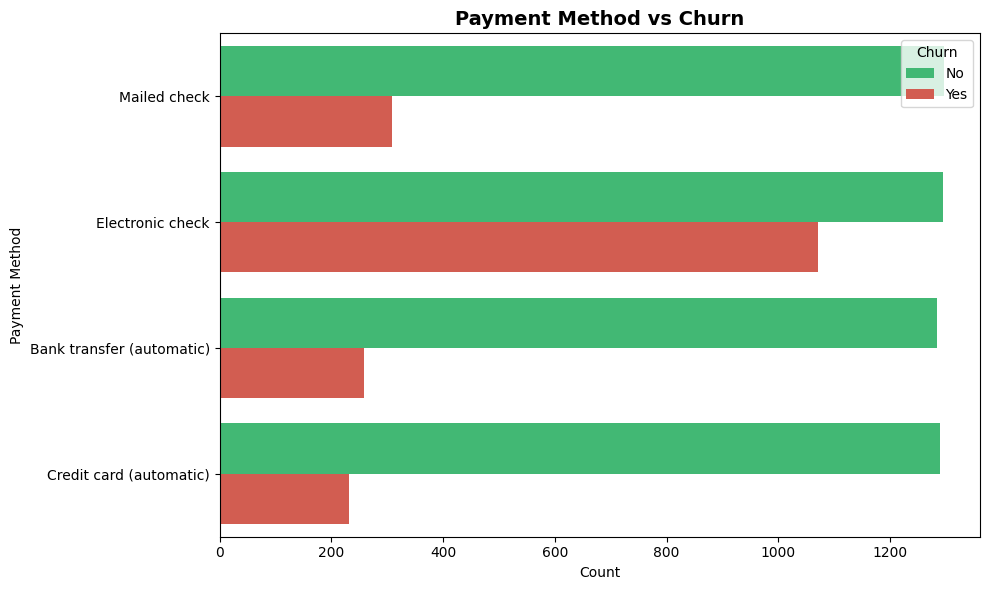

In [27]:
print("\nPayment Method Analysis:")
payment_churn = df.groupby('payment_method')['churn'].agg(['count', 'mean'])
payment_churn['churn_rate_%'] = (payment_churn['mean'] * 100).round(1)
payment_churn = payment_churn.sort_values('churn_rate_%', ascending=False)
print(payment_churn)

plt.figure(figsize=(10, 6))
sns.countplot(y="payment_method", hue="churn", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Payment Method vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('payment_method_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

Electronic check users churn more

Auto-pay methods retain customers

## DEMOGRAPHIC FEATURES


Senior Citizen Analysis:
     count      mean  churn_rate_%
No    5890  0.236503          23.7
Yes   1142  0.416813          41.7


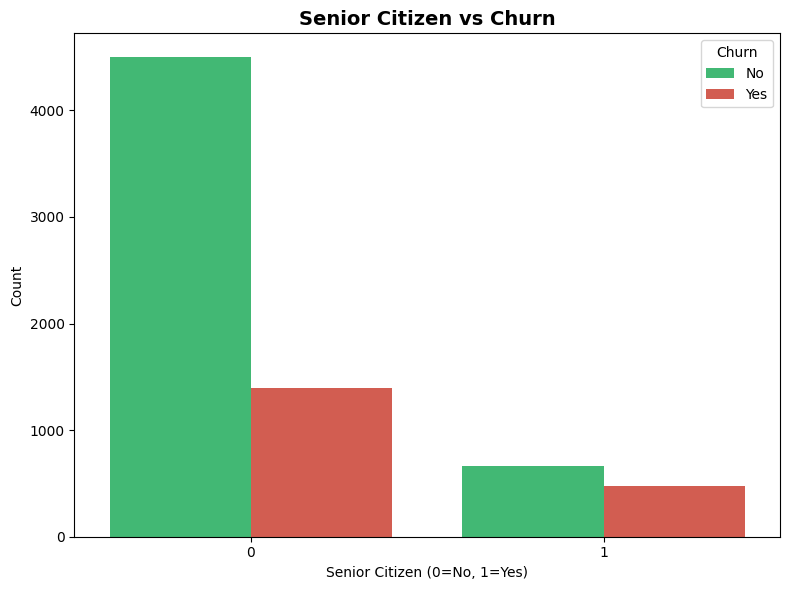

In [28]:
print("\nSenior Citizen Analysis:")
senior_churn = df.groupby('senior_citizen')['churn'].agg(['count', 'mean'])
senior_churn['churn_rate_%'] = (senior_churn['mean'] * 100).round(1)
senior_churn.index = ['No', 'Yes']
print(senior_churn)

plt.figure(figsize=(8, 6))
sns.countplot(x="senior_citizen", hue="churn", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Senior Citizen vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Senior Citizen (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('senior_citizen_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

Senior citizens churn slightly more

Special retention programs may help


Partner Analysis:
         count      mean  churn_rate_%
partner                               
No        3639  0.329761          33.0
Yes       3393  0.197171          19.7


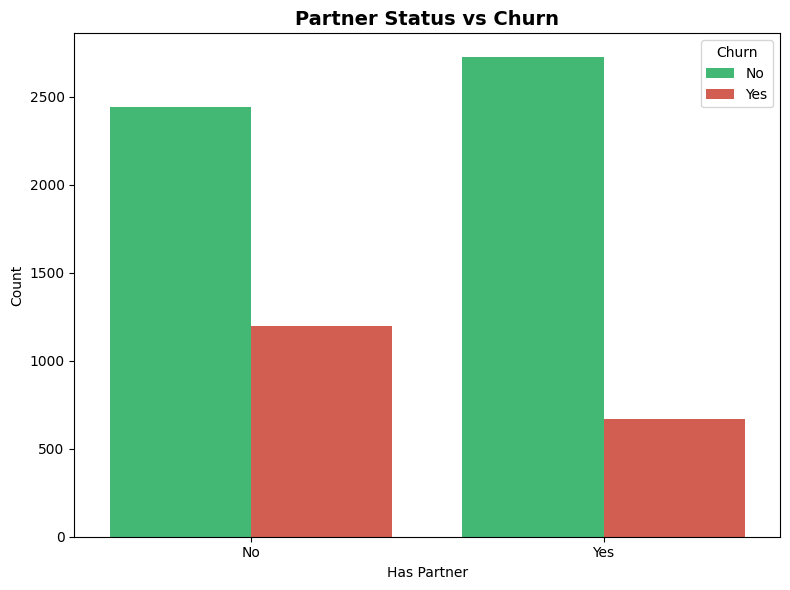


Dependents Analysis:
            count      mean  churn_rate_%
dependents                               
No           5412  0.325758          32.6
Yes          1620  0.065432           6.5


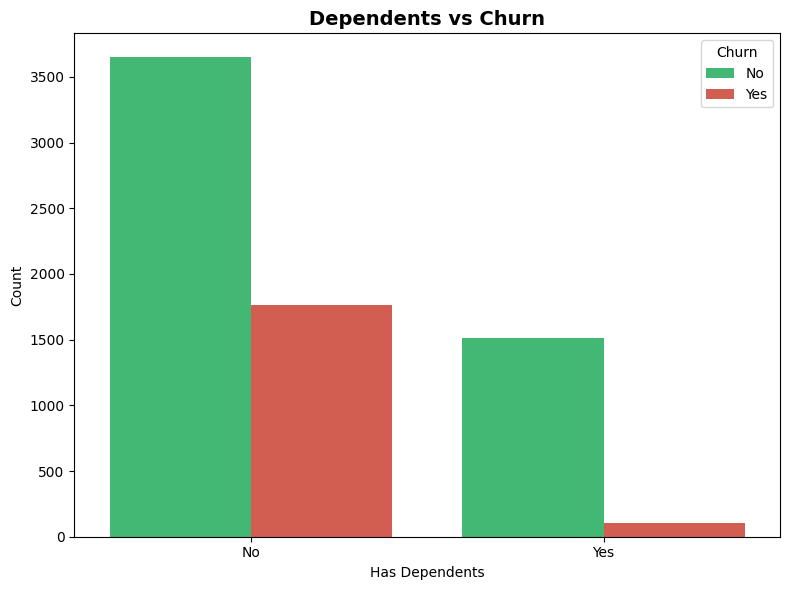

In [29]:
print("\nPartner Analysis:")
partner_churn = df.groupby('partner')['churn'].agg(['count', 'mean'])
partner_churn['churn_rate_%'] = (partner_churn['mean'] * 100).round(1)
print(partner_churn)

plt.figure(figsize=(8, 6))
sns.countplot(x="partner", hue="churn", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Partner Status vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Has Partner")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('partner_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDependents Analysis:")
dependents_churn = df.groupby('dependents')['churn'].agg(['count', 'mean'])
dependents_churn['churn_rate_%'] = (dependents_churn['mean'] * 100).round(1)
print(dependents_churn)

plt.figure(figsize=(8, 6))
sns.countplot(x="dependents", hue="churn", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Dependents vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Has Dependents")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('dependents_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

Customers with partners/dependents churn less

Family ties increase retention

## CORRELATION ANALYSIS

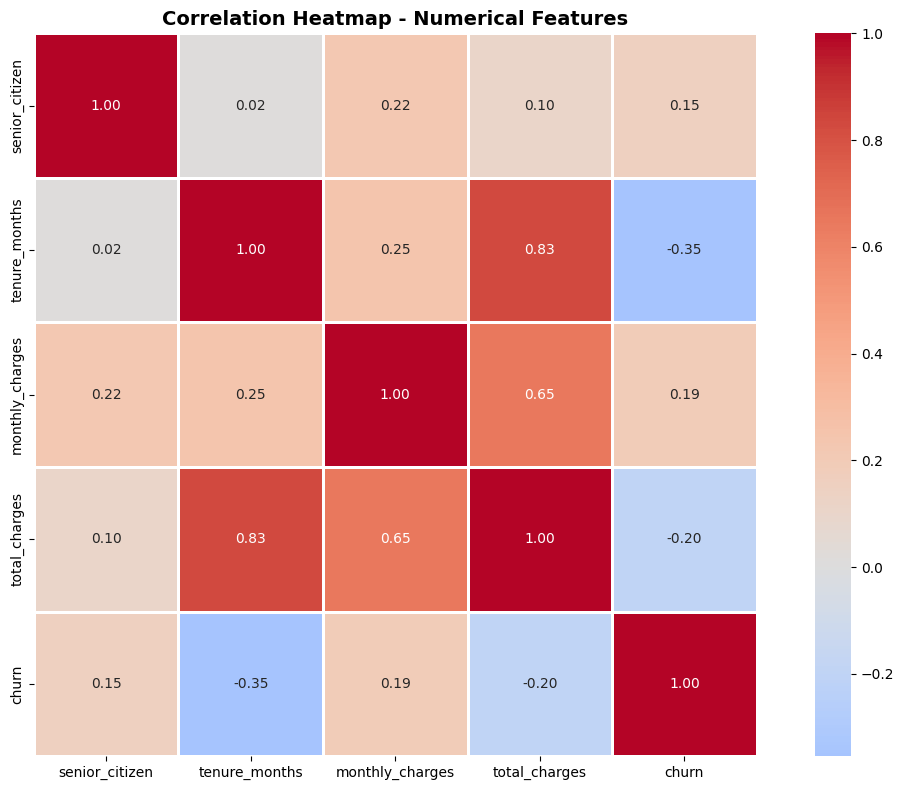


Key Correlations with Churn:
churn              1.000000
monthly_charges    0.192858
senior_citizen     0.150541
total_charges     -0.199484
tenure_months     -0.354049
Name: churn, dtype: float64


In [30]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="coolwarm",
            center=0, square=True, linewidths=1)
plt.title("Correlation Heatmap - Numerical Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Correlations with Churn:")
churn_corr = correlation_matrix['churn'].sort_values(ascending=False)
print(churn_corr)

### Correlation Analysis - Key Insights

The correlation heatmap provides insights into the linear relationships between numerical features and customer churn.

- **Tenure Months vs Churn (-0.35):**
  Tenure shows the strongest correlation with churn among numerical variables.
  The negative correlation indicates that customers with longer tenure are significantly less likely to churn.
  This suggests that customer loyalty increases over time and early customer experience is critical.

- **Monthly Charges vs Churn (0.19):**
  Monthly charges have a positive correlation with churn, indicating that customers paying higher monthly fees are more likely to churn.
  This highlights pricing sensitivity as an important churn driver.

- **Total Charges vs Churn (-0.20):**
  Total charges show a negative correlation with churn.
  Customers who have paid more over time (typically long-tenure customers) are less likely to churn, reinforcing the importance of retention.

- **Tenure Months vs Total Charges (0.83):**
  A strong positive correlation exists between tenure and total charges.
  This is expected, as customers who stay longer naturally accumulate higher total charges.
  Due to this strong correlation, potential multicollinearity should be considered during modeling.

- **Monthly Charges vs Total Charges (0.65):**
  Monthly charges are moderately correlated with total charges, indicating that both pricing level and duration contribute to overall customer value.

- **Senior Citizen vs Churn (0.15):**
  Senior citizen status shows a weak positive correlation with churn.
  While the effect is small, it suggests senior customers may require targeted retention strategies.

Overall, tenure and pricing-related variables emerge as the most influential numerical factors associated with customer churn.
These insights will guide feature selection and modeling decisions in subsequent steps.


In [32]:
print("Churn by Tenure Segments")
df['tenure_segment'] = pd.cut(df['tenure_months'],
                               bins=[0, 12, 24, 36, 100],
                               labels=['0-12 months', '13-24 months', '25-36 months', '36+ months'])

tenure_segment_churn = df.groupby('tenure_segment')['churn'].agg(['count', 'sum', 'mean'])
tenure_segment_churn['churn_rate_%'] = (tenure_segment_churn['mean'] * 100).round(1)
print(tenure_segment_churn)

# Calculate risk multiplier for early tenure
early_churn = tenure_segment_churn.loc['0-12 months', 'mean']
mature_churn = tenure_segment_churn.loc['36+ months', 'mean']
risk_multiplier = early_churn / mature_churn

print(f"\nEarly Tenure Risk: Customers in first 12 months are {risk_multiplier:.1f}x more likely to churn")

Churn by Tenure Segments
                count   sum      mean  churn_rate_%
tenure_segment                                     
0-12 months      2175  1037  0.476782          47.7
13-24 months     1024   294  0.287109          28.7
25-36 months      832   180  0.216346          21.6
36+ months       3001   358  0.119294          11.9

Early Tenure Risk: Customers in first 12 months are 4.0x more likely to churn


In [33]:
print("Churn by Monthly Charges Segments")
df['charges_segment'] = pd.qcut(df['monthly_charges'],
                                 q=4,
                                 labels=['Low', 'Medium', 'High', 'Very High'])

charges_segment_churn = df.groupby('charges_segment')['churn'].agg(['count', 'mean'])
charges_segment_churn['churn_rate_%'] = (charges_segment_churn['mean'] * 100).round(1)
print(charges_segment_churn)


print("HIGH-RISK CUSTOMER PROFILE ")
high_risk = df[
    (df['tenure_months'] <= 12) &
    (df['contract'] == 'Month-to-month') &
    (df['churn'] == 1)
]

print(f"High-risk customers (≤12 months, M2M contract): {len(high_risk):,}")
print(f"Percentage of all churners: {len(high_risk) / df['churn'].sum() * 100:.1f}%")

Churn by Monthly Charges Segments
                 count      mean  churn_rate_%
charges_segment                               
Low               1758  0.113197          11.3
Medium            1761  0.245883          24.6
High              1755  0.375499          37.5
Very High         1758  0.328783          32.9
HIGH-RISK CUSTOMER PROFILE 
High-risk customers (≤12 months, M2M contract): 1,024
Percentage of all churners: 54.8%


#FEATURE ENGINEERING

In [50]:
X = df.drop(['churn', 'tenure_segment', 'charges_segment'], axis=1)
y = df['churn']

Explicitly separated predictors and target to avoid leakage.

In [51]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
num_features

Index(['senior_citizen', 'tenure_months', 'monthly_charges', 'total_charges'], dtype='object')

In [52]:
cat_features = X.select_dtypes(include=["object"]).columns
cat_features

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object')

Categorical variables are converted into numerical format using One-Hot Encoding.
The first category is dropped to avoid multicollinearity.

In [53]:
X_encoded = pd.get_dummies(X, columns=cat_features, drop_first=True)
print(f"Shape after encoding: {X_encoded.shape}")
print(f"Total features after encoding: {X_encoded.shape[1]}")

Shape after encoding: (7032, 30)
Total features after encoding: 30


The dataset is split into training and testing sets.
Stratification is used to preserve the churn distribution.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_encoded,
    Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

Numerical features are scaled using StandardScaler.
The scaler is fitted only on training data to prevent data leakage.

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

#MODELING

Logistic Regression is used as a baseline due to its interpretability
and effectiveness for binary classification problems.

In [56]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

In [57]:
print("Accuracy:", accuracy_score(Y_test, y_pred_log))
print("Precision:", precision_score(Y_test, y_pred_log))
print("Recall:", recall_score(Y_test, y_pred_log))
print("F1 Score:", f1_score(Y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(Y_test, y_prob_log))

Accuracy: 0.8045486851457001
Precision: 0.6410256410256411
Recall: 0.6016042780748663
F1 Score: 0.6206896551724138
ROC-AUC: 0.8431713352418323


In [59]:
print("\nConfusion Matrix:")
cm_log = confusion_matrix(Y_test, y_pred_log)
print(cm_log)
print(f"\nTrue Negatives:  {cm_log[0,0]}")
print(f"False Positives: {cm_log[0,1]}")
print(f"False Negatives: {cm_log[1,0]}")
print(f"True Positives:  {cm_log[1,1]}")


Confusion Matrix:
[[907 126]
 [149 225]]

True Negatives:  907
False Positives: 126
False Negatives: 149
True Positives:  225


Random Forest is used to capture non-linear relationships
and feature interactions.

In [61]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train, Y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [62]:
print("Accuracy:", accuracy_score(Y_test, y_pred_rf))
print("Precision:", precision_score(Y_test, y_pred_rf))
print("Recall:", recall_score(Y_test, y_pred_rf))
print("F1 Score:", f1_score(Y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(Y_test, y_prob_rf))

Accuracy: 0.7697228144989339
Precision: 0.5475285171102662
Recall: 0.7700534759358288
F1 Score: 0.64
ROC-AUC: 0.8441885686774931


In [64]:
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(Y_test, y_pred_rf)
print(cm_rf)
print(f"\nTrue Negatives:  {cm_rf[0,0]}")
print(f"False Positives: {cm_rf[0,1]}")
print(f"False Negatives: {cm_rf[1,0]}")
print(f"True Positives:  {cm_rf[1,1]}")


Confusion Matrix:
[[795 238]
 [ 86 288]]

True Negatives:  795
False Positives: 238
False Negatives: 86
True Positives:  288


In [65]:
print("Model Comparison Summary ")

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'],
    'Logistic Regression': [
        accuracy_score(Y_test, y_pred_log),
        precision_score(Y_test, y_pred_log),
        recall_score(Y_test, y_pred_log),
        f1_score(Y_test, y_pred_log),
        roc_auc_score(Y_test, y_prob_log)
    ],
    'Random Forest': [
        accuracy_score(Y_test, y_pred_rf),
        precision_score(Y_test, y_pred_rf),
        recall_score(Y_test, y_pred_rf),
        f1_score(Y_test, y_pred_rf),
        roc_auc_score(Y_test, y_prob_rf)
    ]
})

comparison_df['Difference'] = comparison_df['Random Forest'] - comparison_df['Logistic Regression']
print("\n" + comparison_df.to_string(index=False))


if roc_auc_score(Y_test, y_prob_rf) > roc_auc_score(Y_test, y_prob_log):
    print("\n Random Forest selected as final model (higher ROC-AUC)")
    final_model = rf_model
    y_prob_final = y_prob_rf
    y_pred_final = y_pred_rf
else:
    print("\n Logistic Regression selected as final model")
    final_model = log_model
    y_prob_final = y_prob_log
    y_pred_final = y_pred_log

Model Comparison Summary 

   Metric  Logistic Regression  Random Forest  Difference
 Accuracy             0.804549       0.769723   -0.034826
Precision             0.641026       0.547529   -0.093497
   Recall             0.601604       0.770053    0.168449
 F1 Score             0.620690       0.640000    0.019310
  ROC-AUC             0.843171       0.844189    0.001017

 Random Forest selected as final model (higher ROC-AUC)


Logistic Regression provides interpretability and serves as a strong baseline.
Random Forest improves performance by capturing complex feature interactions.

The better-performing model can be selected based on ROC-AUC and Recall,
which are critical for churn prediction.

## Feature Importance Analysis

Understanding which features drive customer churn is critical for business decision-making.
In this section, we analyze feature importance from the Random Forest model
and translate the results into actionable business insights.

### Top Features Influencing Customer Churn

The following plot highlights the most important features contributing to churn prediction.


Top 15 Most Important Features:
                              Feature  Importance
                        tenure_months    0.169606
                        total_charges    0.130938
                    contract_Two year    0.099303
                      monthly_charges    0.093412
                       dependents_Yes    0.080317
         internet_service_Fiber optic    0.060558
      payment_method_Electronic check    0.049226
                    contract_One year    0.041911
                  online_security_Yes    0.033346
                     tech_support_Yes    0.020922
 streaming_movies_No internet service    0.019116
  online_security_No internet service    0.015803
                paperless_billing_Yes    0.015217
device_protection_No internet service    0.015090
                          gender_Male    0.014105


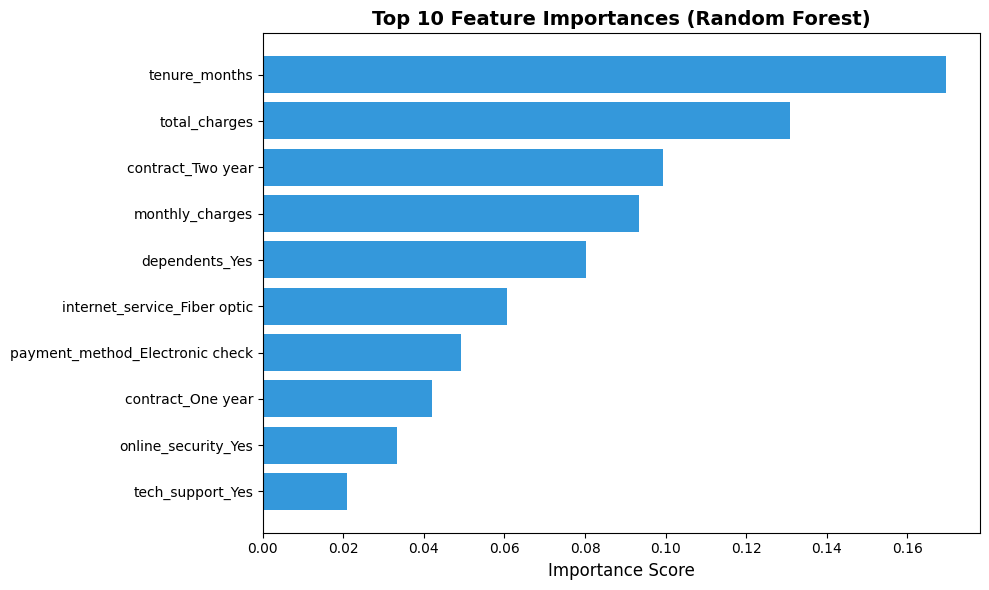

In [68]:
if isinstance(final_model, RandomForestClassifier):
    feature_names = X_train.columns
    importances = rf_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    print("\nTop 15 Most Important Features:")
    print(feature_importance_df.head(15).to_string(index=False))

    top_features = feature_importance_df.head(10)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_features)), top_features['Importance'], color='#3498db')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.gca().invert_yaxis()
    plt.xlabel("Importance Score", fontsize=12)
    plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

### Interpretation of Feature Importance

The feature importance analysis reveals that financial and tenure-related
features are the strongest drivers of customer churn.

- **Total Charges**, **Tenure Months**, and **Monthly Charges** are the top predictors,
  indicating that pricing and customer lifecycle stage play a critical role.
- Customers on **long-term contracts (one-year or two-year)** are significantly
  less likely to churn compared to month-to-month customers.
- Customers with **dependents** show lower churn probability, suggesting higher stability.
- Use of **fiber optic internet** and **electronic check payment method**
  is associated with higher churn risk.
- **Online security services** reduce churn, highlighting the importance of
  value-added services.
- Demographic features such as gender have minimal impact on churn.


#Business context and ROI analysis

In [69]:
print("\nBusiness Parameters (Assumptions) ")

AVG_MONTHLY_CHARGES = df['monthly_charges'].mean()
AVG_TENURE_MONTHS = df['tenure_months'].mean()
CUSTOMER_LIFETIME_VALUE = AVG_MONTHLY_CHARGES * AVG_TENURE_MONTHS

# Assumed intervention cost
INTERVENTION_COST_PER_CUSTOMER = 100

print(f"Average Monthly Revenue per Customer: ${AVG_MONTHLY_CHARGES:.2f}")
print(f"Average Customer Tenure: {AVG_TENURE_MONTHS:.1f} months")
print(f"Customer Lifetime Value (CLV): ${CUSTOMER_LIFETIME_VALUE:,.2f}")
print(f"Retention Intervention Cost: ${INTERVENTION_COST_PER_CUSTOMER:.2f}")

# Error Costs
FALSE_NEGATIVE_COST = CUSTOMER_LIFETIME_VALUE
FALSE_POSITIVE_COST = INTERVENTION_COST_PER_CUSTOMER

print("\nCost-Benefit Framework ")
print(f"Cost of Missing a Churner (False Negative): ${FALSE_NEGATIVE_COST:,.2f}")
print(f"Cost of Targeting Loyal Customer (False Positive): ${FALSE_POSITIVE_COST:.2f}")
print(f"Cost Ratio (FN:FP): {FALSE_NEGATIVE_COST/FALSE_POSITIVE_COST:.0f}:1")
print("\n DECISION: Optimize for RECALL to minimize false negatives")
print("   Justification: Missing a churner costs 20x more than wasted intervention")


Business Parameters (Assumptions) 
Average Monthly Revenue per Customer: $64.80
Average Customer Tenure: 32.4 months
Customer Lifetime Value (CLV): $2,100.87
Retention Intervention Cost: $100.00

Cost-Benefit Framework 
Cost of Missing a Churner (False Negative): $2,100.87
Cost of Targeting Loyal Customer (False Positive): $100.00
Cost Ratio (FN:FP): 21:1

 DECISION: Optimize for RECALL to minimize false negatives
   Justification: Missing a churner costs 20x more than wasted intervention


In [72]:
print("ROI Projection ")

# Targeting Strategy: Top 15% highest risk
TARGET_PERCENTAGE = 0.15
INTERVENTION_EFFECTIVENESS = 0.60  # Assume 60% of interventions successfully prevent churn

# Test set analysis
n_test_customers = len(Y_test)
n_actual_churners = Y_test.sum()

# Identify high-risk customers
y_prob_sorted = np.sort(y_prob_final)[::-1]
threshold_15_pct = y_prob_sorted[int(len(y_prob_sorted) * TARGET_PERCENTAGE)]

high_risk_mask = y_prob_final >= threshold_15_pct
n_targeted = high_risk_mask.sum()
n_churners_in_target = ((Y_test == 1) & high_risk_mask).sum()

print(f"\nTest Set Analysis:")
print(f"Total test customers: {n_test_customers:,}")
print(f"Actual churners: {n_actual_churners}")
print(f"Customers targeted (top 15%): {n_targeted}")
print(f"Churners captured in target: {n_churners_in_target}")
print(f"Capture rate: {n_churners_in_target/n_actual_churners*100:.1f}%")

# Scale to annual projections
TOTAL_CUSTOMERS = 7043
ANNUAL_CHURN_RATE = df['churn'].mean()
ANNUAL_CHURNERS = int(TOTAL_CUSTOMERS * ANNUAL_CHURN_RATE)

annual_targeted = int(TOTAL_CUSTOMERS * TARGET_PERCENTAGE)
annual_churners_identified = int(annual_targeted * (n_churners_in_target / n_targeted))
annual_churns_prevented = int(annual_churners_identified * INTERVENTION_EFFECTIVENESS)

# Financial Impact
total_intervention_cost = annual_targeted * INTERVENTION_COST_PER_CUSTOMER
value_retained = annual_churns_prevented * CUSTOMER_LIFETIME_VALUE
net_benefit = value_retained - total_intervention_cost
roi_ratio = value_retained / total_intervention_cost if total_intervention_cost > 0 else 0

print(f"\n ANNUAL ROI PROJECTION:")
print(f"Total customer base: {TOTAL_CUSTOMERS:,}")
print(f"Expected annual churners: {ANNUAL_CHURNERS:,} ({ANNUAL_CHURN_RATE*100:.1f}%)")
print(f"\nRetention Strategy (Target top 15% risk):")
print(f"  Customers targeted: {annual_targeted:,}")
print(f"  Churners identified: {annual_churners_identified:,}")
print(f"  Churns prevented (60% effectiveness): {annual_churns_prevented:,}")
print(f"\nFinancial Impact:")
print(f"  Intervention cost: ${total_intervention_cost:,}")
print(f"  Customer value retained: ${value_retained:,}")
print(f"  Net benefit: ${net_benefit:,}")
print(f"  ROI: {roi_ratio:.1f}:1")
print("=" * 50)

# Sensitivity Analysis
print("\nSensitivity Analysis ")
print("ROI under different intervention effectiveness rates:")

for effectiveness in [0.40, 0.50, 0.60, 0.70, 0.80]:
    prevented = int(annual_churners_identified * effectiveness)
    value = prevented * CUSTOMER_LIFETIME_VALUE
    net = value - total_intervention_cost
    roi = value / total_intervention_cost
    print(f"  {int(effectiveness*100)}% effectiveness: {prevented} churns prevented, "
          f"${net:,} net benefit, {roi:.1f}:1 ROI")

ROI Projection 

Test Set Analysis:
Total test customers: 1,407
Actual churners: 374
Customers targeted (top 15%): 212
Churners captured in target: 144
Capture rate: 38.5%

 ANNUAL ROI PROJECTION:
Total customer base: 7,043
Expected annual churners: 1,871 (26.6%)

Retention Strategy (Target top 15% risk):
  Customers targeted: 1,056
  Churners identified: 717
  Churns prevented (60% effectiveness): 430

Financial Impact:
  Intervention cost: $105,600
  Customer value retained: $903,375.6681972125
  Net benefit: $797,775.6681972125
  ROI: 8.6:1

Sensitivity Analysis 
ROI under different intervention effectiveness rates:
  40% effectiveness: 286 churns prevented, $495,249.8630334948 net benefit, 5.7:1 ROI
  50% effectiveness: 358 churns prevented, $646,512.7656153537 net benefit, 7.1:1 ROI
  60% effectiveness: 430 churns prevented, $797,775.6681972125 net benefit, 8.6:1 ROI
  70% effectiveness: 501 churns prevented, $946,937.697132101 net benefit, 10.0:1 ROI
  80% effectiveness: 573 chur

## Business Insights and Recommendations

Based on the model results, the following actions are recommended:

1. Target **month-to-month customers** with incentives to switch to long-term contracts.
2. Focus retention efforts on **early-tenure customers**, especially within the first year.
3. Review pricing strategies for **high monthly charge customers**.
4. Promote **online security and support services** as retention tools.
5. Monitor customers using **electronic check payments** for early churn signals.

These strategies can help proactively reduce churn and improve customer lifetime value.
